In [1]:
!conda info
!printf "Current Directory=$(pwd)"


     active environment : dataScience
    active env location : /Users/rmn/miniconda3/envs/dataScience
            shell level : 2
       user config file : /Users/rmn/.condarc
 populated config files : 
          conda version : 22.11.1
    conda-build version : not installed
         python version : 3.9.15.final.0
       virtual packages : __archspec=1=arm64
                          __osx=13.0.1=0
                          __unix=0=0
       base environment : /Users/rmn/miniconda3  (writable)
      conda av data dir : /Users/rmn/miniconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-arm64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-arm64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/rmn/miniconda3/pkgs
                          /Users/rmn/.conda/pkgs
       envs directories : /Use

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean
from math import sqrt
from scipy.stats import mannwhitneyu
from typing import Tuple

In [3]:
%matplotlib inline

In [4]:
# path to csv results
AIRFOIL_PATH = "./results.csv"
IMG_PATH="/Users/rmn/masterThesis/master_thesis/img/airfoil_exploratory"

In [5]:
def df_from_path(path: str) -> pd.DataFrame:
    return pd.read_csv(
        filepath_or_buffer=path,
        sep="?",
    )

In [6]:
%%bash
# check if csv contains same number of rows for both algorithms

printf "Pre-trained DAE-LSTM Cases:" ; cat ./results.csv | grep ^pt  | wc -l 
printf "Regular DAE-LSTM Cases    :" ; cat ./results.csv | grep ^dae | wc -l 

# 10 runs * 20 generations (0-20) = 210

Pre-trained DAE-LSTM Cases:     210
Regular DAE-LSTM Cases    :     210


In [7]:
RUNS=10
GENERATIONS=20
HIDDENLAYERS=1

In [8]:
AIRFOIL_RESULTS = df_from_path(AIRFOIL_PATH)
AIRFOIL_RESULTS.describe()

,test_no,generation,after_selection_depth_25percentile,after_selection_depth_50percentile,after_selection_depth_75percentile,after_selection_depth_avg,after_selection_depth_avg_lev_distance_denoising,after_selection_depth_avg_norm_lev_distance_denoising,after_selection_depth_avg_size,after_selection_depth_avg_size_corr_minus_orig,...,size_unique_rate,std_norm_lev_distance_denoising,std_size_corr_minus_orig,time_used,tourn_size,unique,unique_output_vector_rate,unique_output_vector_rate_int,unique_output_vector_rate_test,unique_rate
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.0,420.000000,420.000000,420.000000,420.000000,420.000000
mean,4.500000,10.000000,2.758929,3.348810,4.097024,3.524314,0.453195,0.044943,9.381133,-0.000719,...,0.551705,0.069290,0.535133,1976.087255,7.0,275.852381,0.376229,0.272876,0.376233,0.551705
std,2.875707,6.062522,1.252352,1.360147,1.397862,1.222052,0.190410,0.010566,5.705296,0.023958,...,0.271792,0.019541,0.154360,948.012795,0.0,135.895780,0.274544,0.203117,0.274548,0.271792
min,0.000000,0.000000,1.000000,1.000000,2.000000,1.456000,0.000000,0.000000,3.772000,-0.080000,...,0.014000,0.000000,0.000000,13.309439,7.0,7.000000,0.014000,0.014000,0.014000,0.014000
25%,2.000000,5.000000,2.000000,2.000000,3.000000,2.605000,0.348000,0.045000,6.099000,-0.016000,...,0.341000,0.062750,0.487750,1367.622499,7.0,170.500000,0.173500,0.124000,0.173500,0.341000
50%,4.500000,10.000000,2.000000,3.000000,4.000000,3.312000,0.437000,0.047000,7.954000,0.000000,...,0.541000,0.071000,0.547500,1823.574087,7.0,270.500000,0.275000,0.190000,0.275000,0.541000
75%,7.000000,15.000000,3.000000,4.000000,5.000000,4.116500,0.550500,0.049000,10.326000,0.014000,...,0.762000,0.080000,0.612250,2612.371143,7.0,381.000000,0.513500,0.372500,0.513500,0.762000
max,9.000000,20.000000,7.000000,7.000000,8.000000,7.238000,1.098000,0.057000,33.720000,0.086000,...,1.000000,0.110000,0.906000,4711.395426,7.0,500.000000,0.988000,0.804000,0.988000,1.000000


In [9]:
def split_df(df: pd.DataFrame, dir1: str, dir2: str) -> Tuple[pd.DataFrame, pd.DataFrame]:
    return df.query("directory == @dir1").copy(), df.query("directory == @dir2").copy()
    


In [10]:
pt_results, reg_results = split_df(AIRFOIL_RESULTS, "pt_dae_gp", "dae_gp")
assert pt_results.shape == reg_results.shape
NROWS, NCOLS = pt_results.shape

In [11]:
pt_results.head()

,directory,rund_id,test_no,generation,after_selection_depth_25percentile,after_selection_depth_50percentile,after_selection_depth_75percentile,after_selection_depth_algorithm,after_selection_depth_avg,after_selection_depth_avg_lev_distance_denoising,...,trainableParams,training_error,training_mode,unique,unique_output_vector_rate,unique_output_vector_rate_int,unique_output_vector_rate_sel,unique_output_vector_rate_test,unique_rate,wass_norm_lev_div_sampled_vs_selected
0,pt_dae_gp,1_6160,1,0,2.0,3.5,5.0,DAE_LSTM,3.688,0.000,...,None,None,early_stopping,500,0.988,0.800,None,0.988,1.000,None
1,pt_dae_gp,1_6160,1,1,2.0,3.0,4.0,DAE_LSTM,3.188,0.944,...,177231,0.01,early_stopping,500,0.932,0.696,0.334,0.932,1.000,0.017
2,pt_dae_gp,1_6160,1,2,2.0,2.0,3.0,DAE_LSTM,3.042,0.624,...,177231,0.002,early_stopping,484,0.896,0.642,0.306,0.896,0.968,0.013
3,pt_dae_gp,1_6160,1,3,2.0,2.0,4.0,DAE_LSTM,3.066,0.620,...,177231,0.003,early_stopping,471,0.886,0.636,0.302,0.886,0.942,0.034
4,pt_dae_gp,1_6160,1,4,2.0,2.0,4.0,DAE_LSTM,3.224,0.552,...,177231,0.002,early_stopping,454,0.834,0.588,0.302,0.834,0.908,0.034


In [12]:
reg_results.head()

,directory,rund_id,test_no,generation,after_selection_depth_25percentile,after_selection_depth_50percentile,after_selection_depth_75percentile,after_selection_depth_algorithm,after_selection_depth_avg,after_selection_depth_avg_lev_distance_denoising,...,trainableParams,training_error,training_mode,unique,unique_output_vector_rate,unique_output_vector_rate_int,unique_output_vector_rate_sel,unique_output_vector_rate_test,unique_rate,wass_norm_lev_div_sampled_vs_selected
210,dae_gp,1_9930,1,0,2.0,3.0,5.0,DAE_LSTM,3.632,0.000,...,None,None,early_stopping,500,0.968,0.780,None,0.968,1.000,None
211,dae_gp,1_9930,1,1,2.0,3.0,4.0,DAE_LSTM,3.158,0.706,...,222861,0.002,early_stopping,488,0.904,0.582,0.304,0.904,0.976,0.016
212,dae_gp,1_9930,1,2,2.0,3.0,4.0,DAE_LSTM,2.892,0.474,...,50340,0.016,early_stopping,420,0.736,0.406,0.298,0.736,0.840,0.031
213,dae_gp,1_9930,1,3,2.0,2.0,3.0,DAE_LSTM,2.584,0.422,...,18930,0.043,early_stopping,316,0.512,0.284,0.224,0.512,0.632,0.057
214,dae_gp,1_9930,1,4,2.0,2.0,3.0,DAE_LSTM,2.214,0.338,...,7523,0.056,early_stopping,270,0.428,0.252,0.158,0.428,0.540,0.052


In [13]:
def filter_df_by_headers(df, headers):
    return df[df.columns.intersection(headers)]

In [14]:
AIRFOIL_RESULTS.columns

Index(['directory', 'rund_id', 'test_no', 'generation',
       'after_selection_depth_25percentile',
       'after_selection_depth_50percentile',
       'after_selection_depth_75percentile', 'after_selection_depth_algorithm',
       'after_selection_depth_avg',
       'after_selection_depth_avg_lev_distance_denoising',
       ...
       'trainableParams', 'training_error', 'training_mode', 'unique',
       'unique_output_vector_rate', 'unique_output_vector_rate_int',
       'unique_output_vector_rate_sel', 'unique_output_vector_rate_test',
       'unique_rate', 'wass_norm_lev_div_sampled_vs_selected'],
      dtype='object', length=771)

In [15]:
def mean_vals_per_gen(df: pd.DataFrame, val, ignoreGen0: bool=False):
    
    mean_vals = []
    
    gens = range(min(df["generation"]), max(df["generation"]))
    for gen in gens:

            if ignoreGen0 and gen == 0:
                continue
        
            gen_df = df.loc[df['generation'] == gen]
    
            test_nums = range(min(df["test_no"]), max(df["test_no"]))
            vals = []
            for test_num in test_nums:
                
                row = gen_df.loc[gen_df["test_no"] == test_num]
                vals.append(float(row[val].iloc[0]))


            mean_vals.append(mean(vals))
    
    return mean_vals    

def vals_per_test_num(df: pd.DataFrame, val, test_num, ignoreGen0: bool=False):
    
    vals = []
    
    gens = range(min(df["generation"]), max(df["generation"]))
    for gen in gens:

            if ignoreGen0 and gen == 0:
                continue
        
            gen_df = df.loc[df['generation'] == gen]
    
                
            row = gen_df.loc[gen_df["test_no"] == test_num]
            vals.append(float(row[val].iloc[0]))
    
    return vals    



def root_mean_vals_per_gen(df: pd.DataFrame, val):
    
    mean_vals = []
    
    gens = range(min(df["generation"]), max(df["generation"]))
    for gen in gens:
        
            gen_df = df.loc[df['generation'] == gen]
    
            test_nums = range(min(df["test_no"]), max(df["test_no"]))
            vals = []
            for test_num in test_nums:
                
                row = gen_df.loc[gen_df["test_no"] == test_num]
                vals.append(row[val].iloc[0])

            mean_vals.append(sqrt(mean(vals)))
    
    return mean_vals    

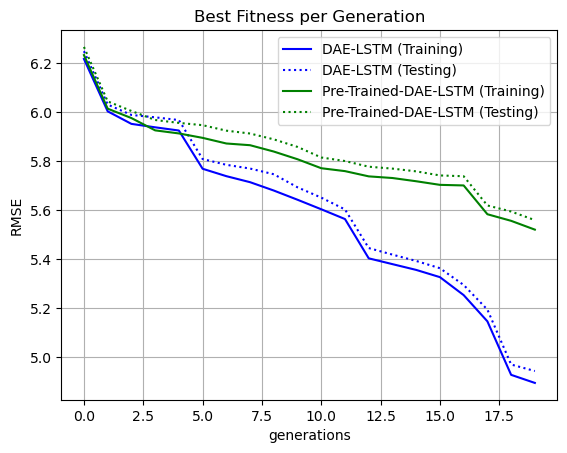

MannwhitneyuResult(statistic=120.0, pvalue=0.03151710207456157)

In [16]:
# rmse
reg_mean_best_fit = root_mean_vals_per_gen(reg_results, "best_fitness")
pt_mean_best_fit =  root_mean_vals_per_gen(pt_results, "best_fitness")
reg_mean_best_fit_test = root_mean_vals_per_gen(reg_results, "best_fitness_test")
pt_mean_best_fit_test =  root_mean_vals_per_gen(pt_results, "best_fitness_test")
gens = list(range(len(reg_mean_best_fit)))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(gens, reg_mean_best_fit, "b" , label="DAE-LSTM (Training)")
ax.plot(gens, reg_mean_best_fit_test, "b" ,linestyle="dotted", label="DAE-LSTM (Testing)")

ax.plot(gens, pt_mean_best_fit, "g" , label="Pre-Trained-DAE-LSTM (Training)")
ax.plot(gens, pt_mean_best_fit_test, "g" ,linestyle="dotted", label="Pre-Trained-DAE-LSTM (Testing)")

ax.grid(True)


ax.set_xlabel("generations")
ax.set_ylabel("RMSE")

ax.legend()

ax.set_title("Best Fitness per Generation")
plt.savefig(f"{IMG_PATH}/best_fitness_per_generation_rmse.png")
plt.show()




mannwhitneyu(reg_mean_best_fit, pt_mean_best_fit)

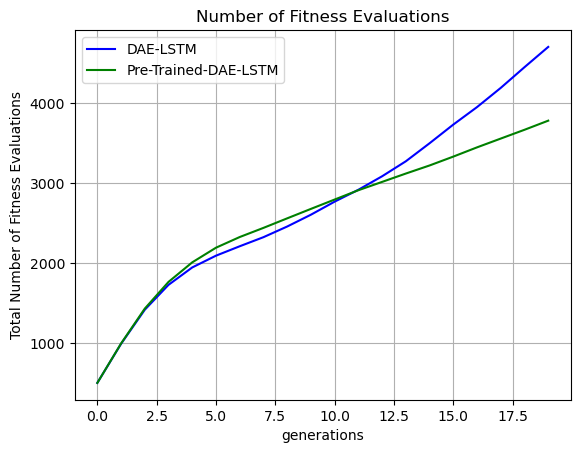

MannwhitneyuResult(statistic=210.5, pvalue=0.786765171721284)

<Figure size 640x480 with 0 Axes>

In [17]:
# plot number of evaluations per generation

reg_mean_nevals = mean_vals_per_gen(reg_results, "nevals")
pt_mean_nevals =  mean_vals_per_gen(pt_results, "nevals")
gens = list(range(len(reg_mean_nevals)))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(gens, reg_mean_nevals, "b" , label="DAE-LSTM")
ax.plot(gens, pt_mean_nevals, "g" , label="Pre-Trained-DAE-LSTM")
ax.grid(True)


ax.set_xlabel("generations")
ax.set_ylabel("Total Number of Fitness Evaluations")

ax.legend()

ax.set_title("Number of Fitness Evaluations")


plt.show()
plt.savefig("fitness_evals_per_generation.png")
mannwhitneyu(reg_mean_nevals, pt_mean_nevals)

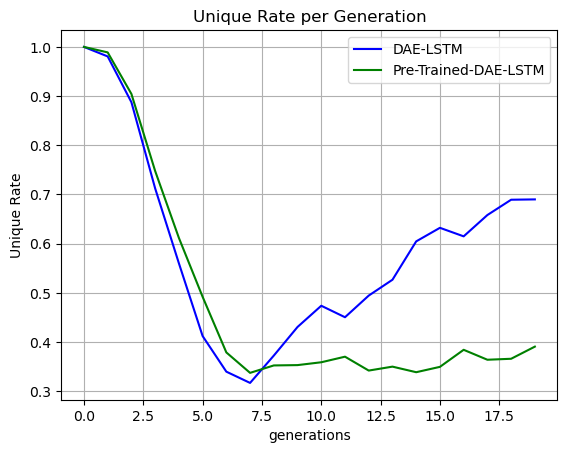

MannwhitneyuResult(statistic=279.5, pvalue=0.03259333353309787)

<Figure size 640x480 with 0 Axes>

In [18]:
# plot unique rate per generation

reg_mean_unique_rate = mean_vals_per_gen(reg_results, "unique_rate")
pt_mean_unique_rate =  mean_vals_per_gen(pt_results, "unique_rate")
gens = list(range(len(reg_mean_nevals)))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(gens, reg_mean_unique_rate, "b" , label="DAE-LSTM")
ax.plot(gens, pt_mean_unique_rate, "g" , label="Pre-Trained-DAE-LSTM")
ax.grid(True)


ax.set_xlabel("generations")
ax.set_ylabel("Unique Rate")

ax.legend()

ax.set_title("Unique Rate per Generation")


plt.show()
plt.savefig("unique_rate_by_generation.png")

mannwhitneyu(reg_mean_unique_rate, pt_mean_unique_rate)

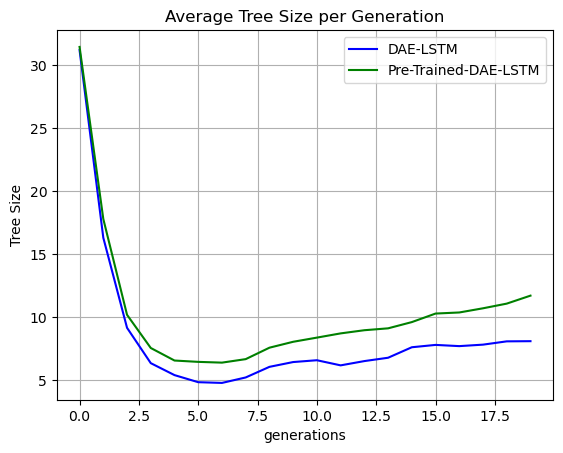

MannwhitneyuResult(statistic=96.0, pvalue=0.005115262023126529)

<Figure size 640x480 with 0 Axes>

In [19]:
# plot avg size

reg_mean_size = mean_vals_per_gen(reg_results, "avg_size")
pt_mean_size =  mean_vals_per_gen(pt_results, "avg_size")
gens = list(range(len(reg_mean_size)))

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(gens, reg_mean_size, "b" , label="DAE-LSTM")
ax.plot(gens, pt_mean_size, "g" , label="Pre-Trained-DAE-LSTM")
ax.grid(True)


ax.set_xlabel("generations")
ax.set_ylabel("Tree Size")

ax.legend()

ax.set_title("Average Tree Size per Generation")




plt.show()
plt.savefig("avg_size_per_generation.png")
mannwhitneyu(reg_mean_size, pt_mean_size)

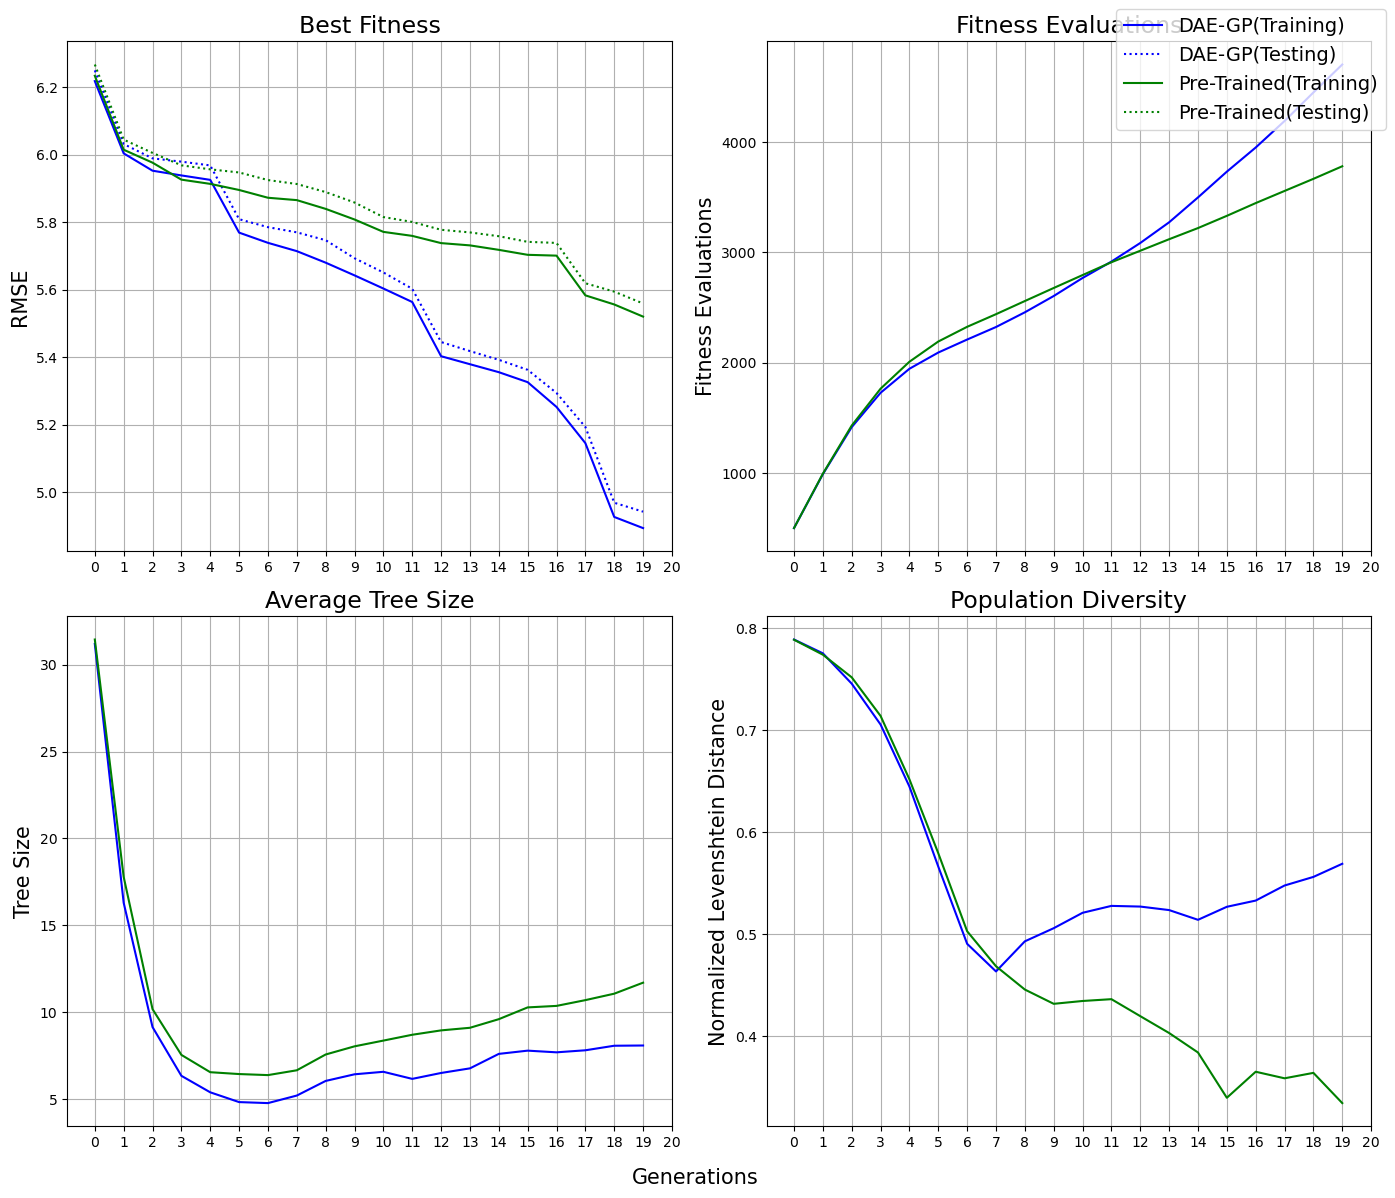

In [32]:
fig, ((ul,ur),(ll,lr)) = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(12,12)

S1 = 15
S2 = 17

# ul - fitness

XTICKS = [x for x in range(0,21)]

reg_mean_best_fit = root_mean_vals_per_gen(reg_results, "best_fitness")
pt_mean_best_fit =  root_mean_vals_per_gen(pt_results, "best_fitness")
reg_mean_best_fit_test = root_mean_vals_per_gen(reg_results, "best_fitness_test")
pt_mean_best_fit_test =  root_mean_vals_per_gen(pt_results, "best_fitness_test")
gens = list(range(len(reg_mean_best_fit)))

ul.plot(gens, reg_mean_best_fit, "b" , label="DAE-GP(Training)")
ul.plot(gens, reg_mean_best_fit_test, "b" ,linestyle="dotted", label="DAE-GP(Testing)")

ul.plot(gens, pt_mean_best_fit, "g" , label="Pre-Trained(Training)")
ul.plot(gens, pt_mean_best_fit_test, "g" ,linestyle="dotted", label="Pre-Trained(Testing)")

ul.grid(True)


#ul.set_xlabel("Generations", fontsize=S1)
ul.set_ylabel("RMSE", fontsize=S1)
ul.set_title("Best Fitness", fontsize=S2)
ul.set_xticks(XTICKS)

# ur - fitness evals

reg_mean_nevals = mean_vals_per_gen(reg_results, "nevals")
pt_mean_nevals =  mean_vals_per_gen(pt_results, "nevals")

ur.plot(gens, reg_mean_nevals, "b" , label="_DAE-LSTM")
ur.plot(gens, pt_mean_nevals, "g" , label="_Pre-Trained-DAE-LSTM")
ur.grid(True)
ur.set_xticks(XTICKS)


#ur.set_xlabel("Generations", fontsize=S1)
ur.set_ylabel("Fitness Evaluations", fontsize=S1)

ur.set_title("Fitness Evaluations", fontsize=S2)

# ll - size

reg_mean_size = mean_vals_per_gen(reg_results, "avg_size")
pt_mean_size =  mean_vals_per_gen(pt_results, "avg_size")

ll.plot(gens, reg_mean_size, "b" , label="_DAE-LSTM")
ll.plot(gens, pt_mean_size, "g" , label="_Pre-Trained-DAE-LSTM")
ll.grid(True)


#ll.set_xlabel("Generations", fontsize=S1)
ll.set_ylabel("Tree Size", fontsize=S1)
ll.set_xticks(XTICKS)
ll.set_title("Average Tree Size", fontsize=S2)


# lr - unique rate

reg_mean_unique_rate = mean_vals_per_gen(reg_results, "norm_lev_div")
pt_mean_unique_rate =  mean_vals_per_gen(pt_results, "norm_lev_div")

lr.plot(gens, reg_mean_unique_rate, "b" , label="_DAE-LSTM")
lr.plot(gens, pt_mean_unique_rate, "g" , label="_Pre-Trained-DAE-LSTM")
lr.grid(True)

lr.set_xticks(XTICKS)
#lr.set_xlabel("Generations", fontsize=S1)
lr.set_ylabel("Normalized Levenshtein Distance", fontsize=S1)
lr.set_title("Population Diversity", fontsize=S2)

fig.legend(fontsize=14)
fig.set_tight_layout(True)
fig.supxlabel("Generations", fontsize=S1,)
#fig.suptitle("Airfoil Dataset - Average for 10 Runs", fontsize=19)
fig.set_size_inches(14,12)

fig.savefig(f"{IMG_PATH}/airfoil_exploratory.png")





In [27]:
"norm_lev_div" in pt_results.columns

True